In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
raw_data = pd.read_csv('../MNIST_CSV/mnist_train.csv')

In [3]:
data = raw_data.to_numpy()
np.random.shuffle(data)

In [4]:
Y = data[1:,0]
X = data[1:,1:]/255
N, D = X.shape
K = len(set(Y))


In [5]:
def one_hard(local_data, n, k):
    oh_Y = np.zeros((n, k))
    for i in range(n):
        oh_Y[i, local_data[i]] = 1
    return oh_Y
Y = one_hard(Y, N, K)

In [6]:
W = np.random.randn(D, K)
B = np.random.randn(K)

In [7]:
def softmax(local_data):
    expa = np.exp(local_data)
    return expa/expa.sum(axis=1, keepdims=True)

In [8]:
def forward(x, w, b):
    return softmax(x.dot(w) + b)

In [9]:
def loss_function(py, t):
    epsilon = 1e-12
    py = np.clip(py, epsilon, 1 - epsilon)
    return -(t * np.log(py)).sum()


In [10]:
def predict(py):
    return np.argmax(py, axis=1)

In [15]:
batch_size = 1024
batch = math.ceil(N/batch_size)
batch

59

In [22]:
epochs = 400
l_rate = 0.1
loss_rate = []
py = np.zeros(Y.shape)
for i in range(epochs):
    for j in range(batch):
        x = X[j*batch_size:(j+1)*batch_size,:]
        y = Y[j*batch_size:(j+1)*batch_size,:]
        py[j*batch_size:(j+1)*batch_size] = forward(x, W, B)
        W -= l_rate * x.T.dot(py[j*batch_size:(j+1)*batch_size] - y) / len(x)
        B -= l_rate * (py[j*batch_size:(j+1)*batch_size] - y).sum(axis=0) / len(x)
    loss = loss_function(py[j*batch_size:(j+1)*batch_size], y)
    loss_rate.append(loss)

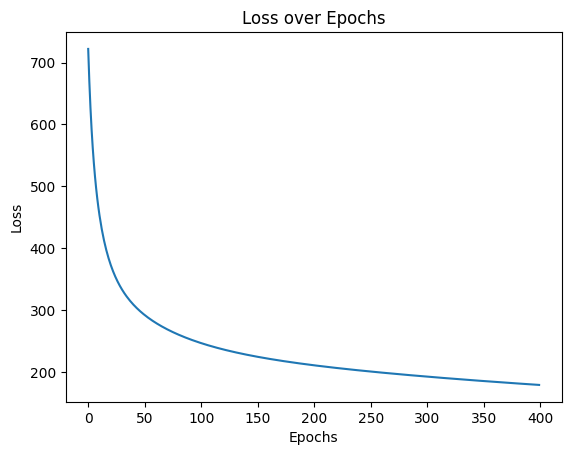

In [23]:
plt.plot(loss_rate)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [24]:
p = predict(py)
y = predict(Y)

res = np.sum([p==y])/N
res

0.9112470415680523